In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'AgeDataset-V1.csv')
df

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,NaN,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,NaN,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,NaN,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [3]:
df.shape

(1223009, 10)

In [4]:
df.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [6]:
#Check the Average null Value 
null_value = [ feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in null_value:
    print("{} is having {} % of null value".format(feature,round((df[feature].isnull().mean())*100)))
    

Short description is having 6 % of null value
Gender is having 11 % of null value
Country is having 27 % of null value
Occupation is having 17 % of null value
Manner of death is having 96 % of null value


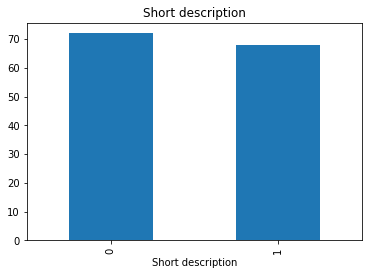

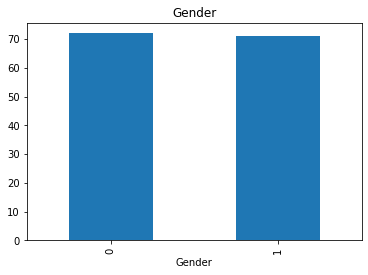

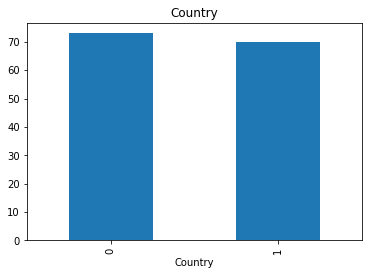

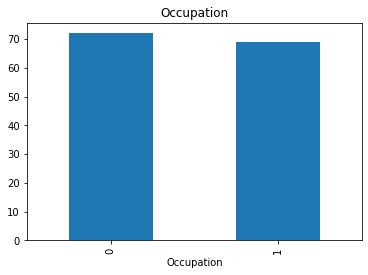

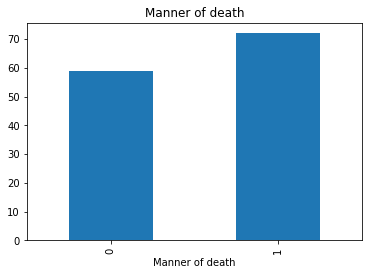

In [7]:
#Check the impact of the missing in Age of Death
for feature in null_value:
    dataset =df.copy()
    dataset[feature] = np.where(df[feature].isnull(),1,0)
    dataset.groupby(feature)['Age of death'].median().plot.bar()
    plt.title(feature)
    plt.show()

Null Value is creating a same impact on Age of Death

In [8]:
df['Manner of death'].unique()

array(['natural causes', 'homicide', nan, 'suicide', 'accident',
       'capital punishment', 'death in battle', 'unnatural death',
       'extrajudicial killing', 'capital punishment; suicide',
       'homicide; natural causes', 'capital punishment; homicide',
       'euthanasia', 'suicide; natural causes',
       'capital punishment; unnatural death', 'epilepsy', 'complication',
       'summary execution', 'suicide; accident',
       'suicide; homicide; accident', 'suicide; homicide; natural causes',
       'suicide; unfortunate accident', 'gunshot', 'internal bleeding',
       'cardiac arrest; natural causes', 'accident; natural causes',
       'Pospíšil', 'Category:People executed by firing squad', 'era',
       'homicide; regicide', 'capital punishment; torture',
       'maternal death', 'strain', 'Eastern Front of World War II',
       'sleep apnea', 'suicide attack', 'Şəhadət', 'lynching',
       'homicide; strangling', 'killing', 'schizophrenia',
       'homicide; ballistic tra

<AxesSubplot:>

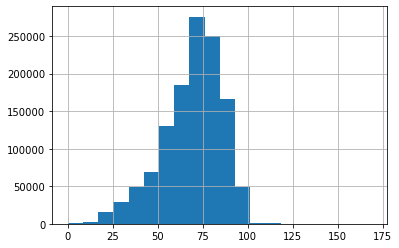

In [9]:
df['Age of death'].hist(bins=20)

In [10]:
df.describe().round()

,Birth year,Death year,Age of death
count,1223009.0,1223008.0,1223008.0
mean,1845.0,1914.0,69.0
std,148.0,152.0,17.0
min,-2700.0,-2659.0,0.0
25%,1828.0,1895.0,60.0
50%,1887.0,1955.0,72.0
75%,1918.0,1994.0,81.0
max,2016.0,2021.0,169.0


<AxesSubplot:xlabel='Age of death'>

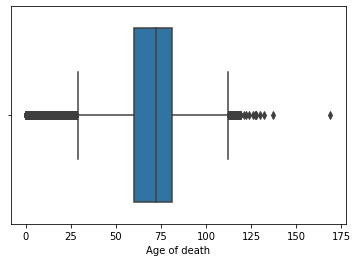

In [11]:
sns.boxplot(data=df,x=df['Age of death'])

 
-Few was died at age of zero 
-Few was died after 125 (it is possible but in very rare cases)

<AxesSubplot:ylabel='Density'>

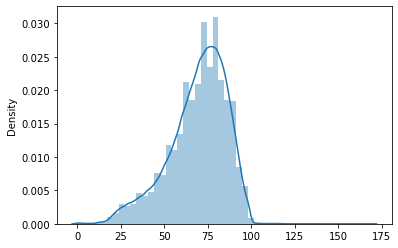

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df['Age of death'])

-Max people were died between Age of 65 to 95

In [13]:
df['Gender'].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

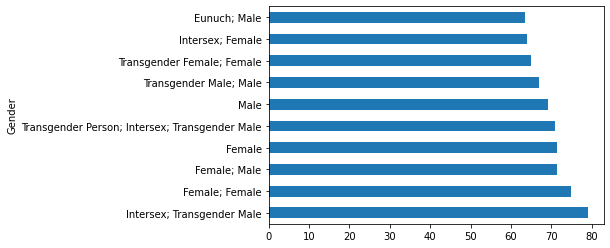

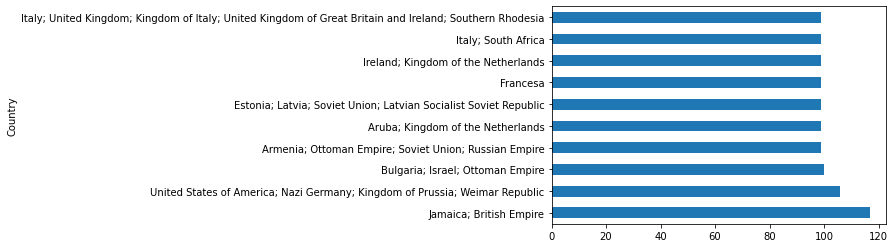

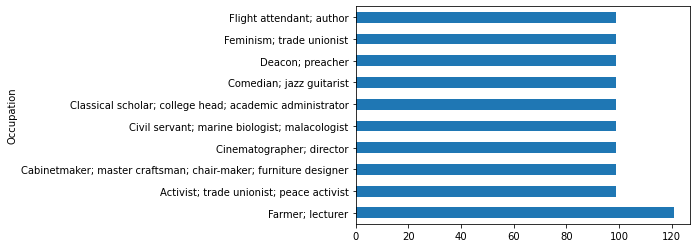

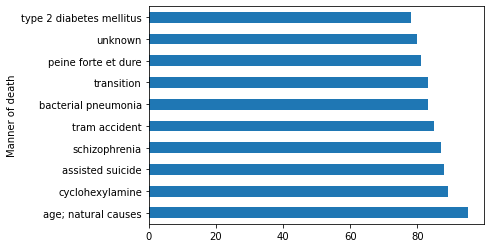

In [14]:
categorical_value =[feature for feature in df.columns if df[feature].dtypes =='object' and feature not in ['Id']+ ['Name']+['Short description']]
for feature in categorical_value:
    dataset_final =df.copy()
    dataset_final.groupby(feature)['Age of death'].mean().nlargest(10).plot(kind='barh') 
    plt.show()

-type 2 diabetes petient were died earlier.
-Farmer lecturer occupation people has higher avg. age of death (survied more.)
-Those people who belong from jamaica, they survied for longer period.

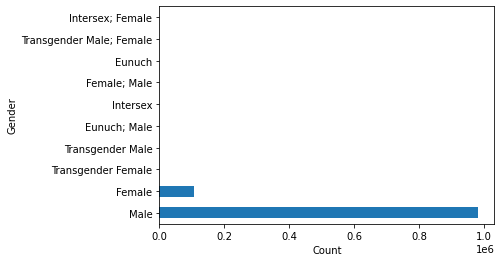

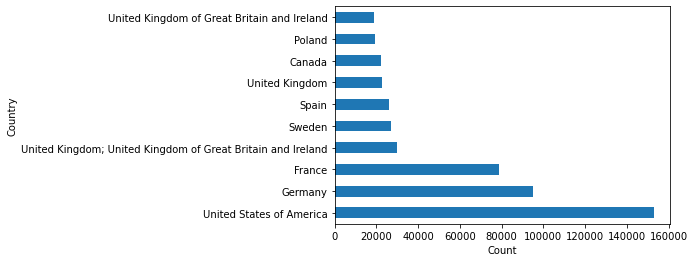

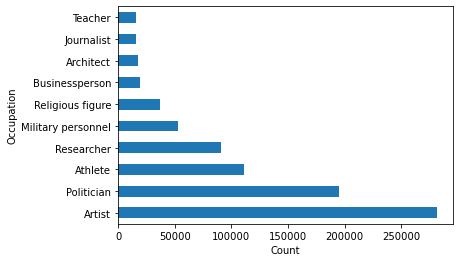

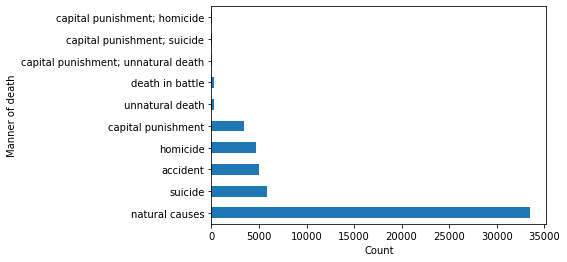

In [15]:
for feature in categorical_value:
    dataset_final[feature].value_counts().nlargest(10).plot(kind='barh')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


-Most of the known people were from USA

In [16]:
dataset

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,0,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,0,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,0,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,1,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,1,57.0
...,...,...,...,...,...,...,...,...,...,...
1223004,Q77247326,Marie-Fortunée Besson,Frans model (1907-1996),NaN,France,Tailor; model,1907,1996.0,1,89.0
1223005,Q77249504,Ron Thorsen,xugador de baloncestu canadianu (1948–2004),NaN,Canada; United States of America,Athlete,1948,2004.0,1,56.0
1223006,Q77249818,Diether Todenhagen,German navy officer and world war II U-boat co...,NaN,Germany,Military personnel,1920,1944.0,1,24.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,1,28.0


In [17]:
dataset_final = dataset_final[dataset_final['Gender'].isin(['Male','Female'])]


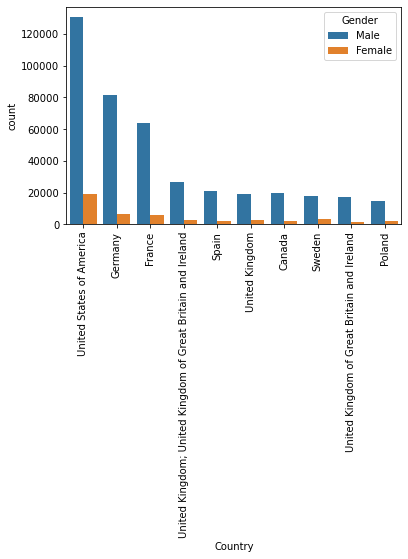

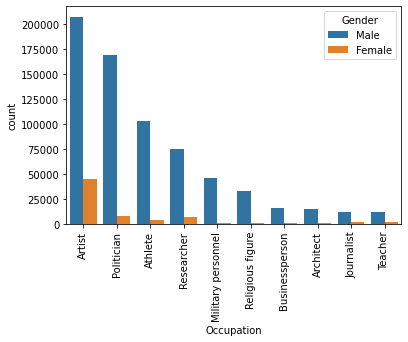

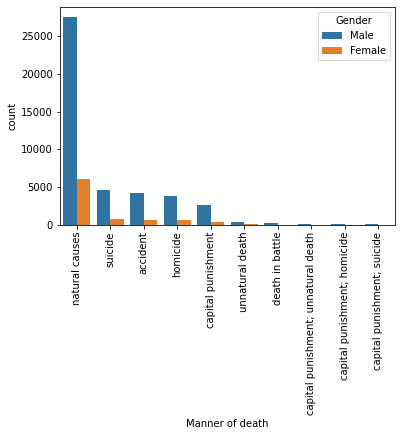

In [18]:
categorical_feature =[feature for feature in dataset_final.columns if dataset_final[feature].dtypes =='object' and feature not in ['Id']+ ['Name']+['Short description']+['Gender']]
for feature in categorical_feature:
    sns.countplot(x=dataset_final[feature],data=dataset_final,hue='Gender',order=dataset_final[feature].value_counts().nlargest(10).index)
    plt.xticks(rotation=90)
    plt.show()
    
    
      
  
    
    

- Most of the famous people having a profession of Artist and politician 
- Max. belong to USA, Germany and UK

In [19]:
len(dataset_final[dataset_final.duplicated(['Name','Birth year','Death year'])])

400

In [20]:
Data_new= dataset_final.drop_duplicates(subset=['Name','Birth year','Death year'],keep=False)

In [21]:
len(Data_new[Data_new.duplicated(['Name','Birth year','Death year'])])

0

In [22]:
Data_new

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1222997,Q77207528,Kurt Denecke,surgeon,Male,NaN,Physician,1903,1991.0,NaN,88.0
1222998,Q77217025,Peter Albrechtsen,grönländischer Landesrat,Male,NaN,NaN,1891,1929.0,NaN,38.0
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,NaN,67.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [23]:
#Data_new=Data_new.loc[:,['Country','Occupation','Manner of death']].fillna('Missing')
#Data_new

In [24]:
#Data_new['Manner of death'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'natural causes'),
  Text(1, 0, 'suicide'),
  Text(2, 0, 'accident'),
  Text(3, 0, 'homicide'),
  Text(4, 0, 'capital punishment'),
  Text(5, 0, 'unnatural death'),
  Text(6, 0, 'death in battle'),
  Text(7, 0, 'capital punishment; unnatural death'),
  Text(8, 0, 'capital punishment; suicide'),
  Text(9, 0, 'capital punishment; homicide')])

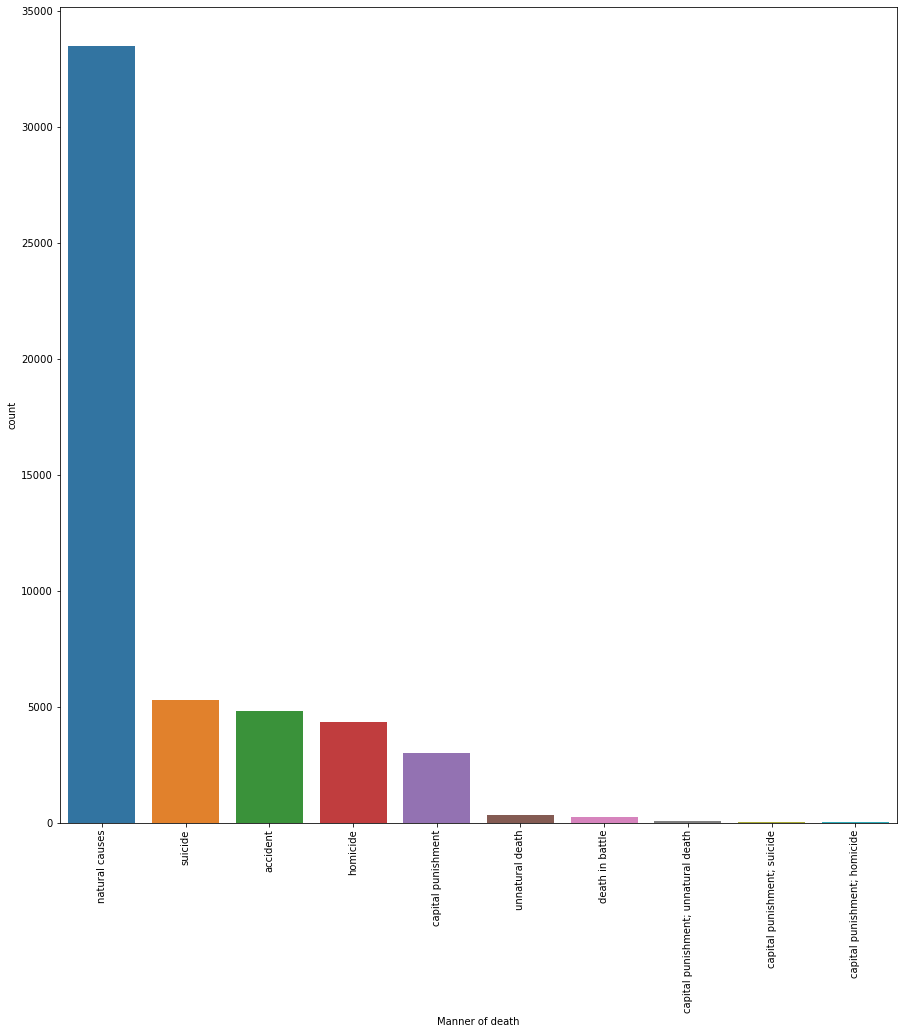

In [25]:
plt.figure(figsize=(15,15))
sns.countplot(x='Manner of death',data=Data_new,order=df['Manner of death'].value_counts().nlargest(10).index)
plt.xticks(rotation=90)

In [26]:
dataset_final

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1222997,Q77207528,Kurt Denecke,surgeon,Male,NaN,Physician,1903,1991.0,NaN,88.0
1222998,Q77217025,Peter Albrechtsen,grönländischer Landesrat,Male,NaN,NaN,1891,1929.0,NaN,38.0
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,NaN,67.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [27]:
dataset_final['Birth year'] =dataset_final['Birth year'].astype(str)
dataset_final['Death year'] = dataset_final['Death year'].astype(str)




In [28]:
dataset_final['Birth year'] = dataset_final['Birth year'].apply(lambda x: x.strip('-')).astype(int)



<AxesSubplot:xlabel='Birth year'>

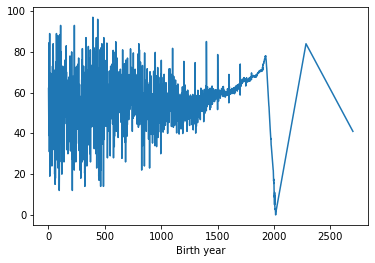

In [29]:
dataset_final.groupby('Birth year')['Age of death'].mean().plot()

- Avg age of death was low in the year of 2000

<AxesSubplot:xlabel='Birth year'>

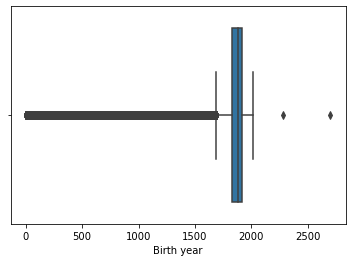

In [30]:
sns.boxplot(dataset_final['Birth year'],data=dataset_final)


- Exclude the data of persons who born in or after 2022

In [31]:

dataset_final = dataset_final.drop(dataset_final[dataset_final['Birth year'] >2022].index)
dataset_final

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...
1222997,Q77207528,Kurt Denecke,surgeon,Male,NaN,Physician,1903,1991.0,NaN,88.0
1222998,Q77217025,Peter Albrechtsen,grönländischer Landesrat,Male,NaN,NaN,1891,1929.0,NaN,38.0
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,NaN,67.0
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,NaN,28.0


In [32]:
dataset_final['Death year'] = dataset_final['Death year'].apply(lambda x: x.strip('-'))
dataset_final['Death year'] = dataset_final['Death year'].apply(lambda x: x.split('.')[0])

<AxesSubplot:xlabel='Death year'>

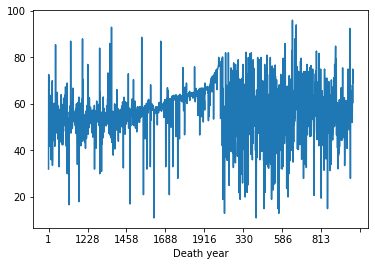

In [33]:
dataset_final.groupby('Death year')['Age of death'].mean().plot()

In [34]:
dataset_final['Death year']= dataset_final['Death year'].astype(str)

In [35]:
dataset_final['Death year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1089193 entries, 0 to 1223008
Series name: Death year
Non-Null Count    Dtype 
--------------    ----- 
1089193 non-null  object
dtypes: object(1)
memory usage: 16.6+ MB


In [36]:
dataset_final['Death year']= dataset_final['Death year'].apply(lambda x: x.replace('nan','0'))

In [37]:
dataset_final[dataset_final['Death year'] =='nan'].size

0

In [38]:
dataset_final['Death year']=dataset_final['Death year'].astype(int)

In [39]:
dataset_final['Death year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1089193 entries, 0 to 1223008
Series name: Death year
Non-Null Count    Dtype
--------------    -----
1089193 non-null  int32
dtypes: int32(1)
memory usage: 12.5 MB


In [40]:
dataset_final['Rectify Age of death']= dataset_final['Death year'] - dataset_final['Birth year']

In [41]:
dataset_final

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Rectify Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0,67
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49.0,49
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56.0,56
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35.0,35
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57.0,57
...,...,...,...,...,...,...,...,...,...,...,...
1222997,Q77207528,Kurt Denecke,surgeon,Male,NaN,Physician,1903,1991,NaN,88.0,88
1222998,Q77217025,Peter Albrechtsen,grönländischer Landesrat,Male,NaN,NaN,1891,1929,NaN,38.0,38
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924,NaN,67.0,67
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915,NaN,28.0,28


-Removing data of the persons whose age of Rectify Age of Death is not matching of Age of Death

In [42]:
dataset_final=dataset_final[dataset_final['Age of death']==dataset_final['Rectify Age of death']]

In [43]:
df.size

12230090

In [44]:
dataset_final

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Rectify Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0,67
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49.0,49
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56.0,56
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35.0,35
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57.0,57
...,...,...,...,...,...,...,...,...,...,...,...
1222997,Q77207528,Kurt Denecke,surgeon,Male,NaN,Physician,1903,1991,NaN,88.0,88
1222998,Q77217025,Peter Albrechtsen,grönländischer Landesrat,Male,NaN,NaN,1891,1929,NaN,38.0,38
1223000,Q77218559,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924,NaN,67.0,67
1223007,Q77253909,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915,NaN,28.0,28


In [45]:
dataset_final = dataset_final.drop(['Id','Name','Short description','Rectify Age of death'], axis= 1)

In [46]:
dataset_final 

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Male,United States of America,Politician,1809,1865,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,NaN,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,NaN,57.0
...,...,...,...,...,...,...,...
1222997,Male,NaN,Physician,1903,1991,NaN,88.0
1222998,Male,NaN,NaN,1891,1929,NaN,38.0
1223000,Male,Switzerland,Entrepreneur,1857,1924,NaN,67.0
1223007,Male,United Kingdom,Artist,1887,1915,NaN,28.0


- Handling Missing Value

In [47]:
dataset_final.isnull().sum()

Gender                   0
Country             292264
Occupation          167510
Birth year               0
Death year               0
Manner of death    1036693
Age of death             0
dtype: int64

In [48]:
dataset_final[['Country','Occupation','Manner of death']]= dataset_final[['Country','Occupation','Manner of death']].fillna('Missing')

In [49]:
dataset_final['Manner of death'].value_counts()

Missing                                  1036693
natural causes                             33500
suicide                                     5282
accident                                    4799
homicide                                    4332
                                          ...   
rape                                           1
chronic obstructive pulmonary disease          1
suicide; substance abuse                       1
occupational injury                            1
White Terror                                   1
Name: Manner of death, Length: 198, dtype: int64

In [50]:
dataset_final

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Male,United States of America,Politician,1809,1865,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,Missing,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,Missing,57.0
...,...,...,...,...,...,...,...
1222997,Male,Missing,Physician,1903,1991,Missing,88.0
1222998,Male,Missing,Missing,1891,1929,Missing,38.0
1223000,Male,Switzerland,Entrepreneur,1857,1924,Missing,67.0
1223007,Male,United Kingdom,Artist,1887,1915,Missing,28.0


<AxesSubplot:>

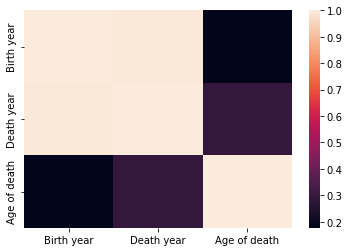

In [51]:
sns.heatmap(dataset_final.corr())

In [52]:
dataset_final['Age of death'].kurtosis()

0.3577203129682225

<AxesSubplot:ylabel='Frequency'>

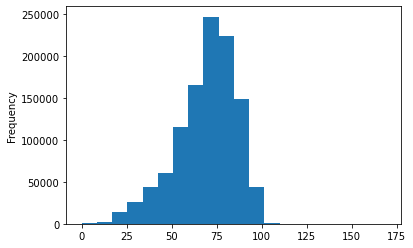

In [53]:
dataset_final['Age of death'].plot.hist(bins=20)

In [54]:
dataset_final['Age of death'].skew()

-0.7707496872294176

- skewness is neagtive indicate data are skewed left


<AxesSubplot:xlabel='Gender', ylabel='count'>

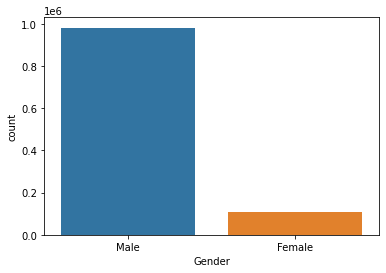

In [55]:
sns.countplot(x='Gender',data=dataset_final)

<AxesSubplot:xlabel='Age of death'>

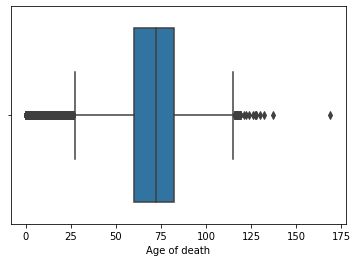

In [56]:
sns.boxplot (dataset_final['Age of death'],data=dataset_final)

<AxesSubplot:xlabel='Birth year'>

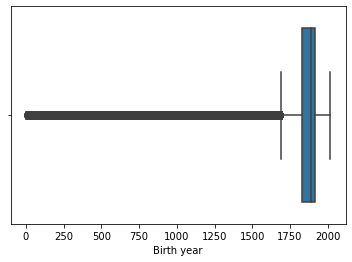

In [57]:
sns.boxplot (dataset_final['Birth year'],data=dataset_final)

In [58]:
dataset_final['Citizenship'] = dataset_final['Country'].apply(lambda x: 0 if type(x) == float else len(x.split('; ')))

In [59]:
dataset_final

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Citizenship
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0,2
1,Male,United Kingdom,Artist,1952,2001,natural causes,49.0,1
2,Male,United States of America,Politician,1809,1865,homicide,56.0,1
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,Missing,35.0,2
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,Missing,57.0,2
...,...,...,...,...,...,...,...,...
1222997,Male,Missing,Physician,1903,1991,Missing,88.0,1
1222998,Male,Missing,Missing,1891,1929,Missing,38.0,1
1223000,Male,Switzerland,Entrepreneur,1857,1924,Missing,67.0,1
1223007,Male,United Kingdom,Artist,1887,1915,Missing,28.0,1


In [60]:
Count= pd.DataFrame({'Citizenship_count':dataset_final['Citizenship'].value_counts()})
Count.style.background_gradient()

,Citizenship_count
1,988403
2,92118
3,6743
4,1082
5,202
6,77
7,24
8,5
9,3
10,1


Some of the cases persons having citizenship of more than 5 countries amazing

<AxesSubplot:xlabel='Citizenship', ylabel='Age of death'>

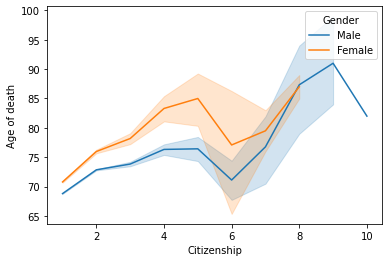

In [61]:
sns.lineplot(x='Citizenship', y= 'Age of death',data=dataset_final,hue="Gender")

- Citizenship is creating directly impact on the Age of Death

In [67]:
dataset_final.groupby('Gender')['Age of death'].mean().reset_index()

,Gender,Age of death
0,Female,71.323567
1,Male,69.192394


-Female has higher Average Age of death